<a href="https://colab.research.google.com/github/vishalraul/Zomato-Restaurant-clustering-and-sentiment-analysis/blob/main/4_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Capstone Project-04/Zomato Restaurant names and Metadata.csv')
data.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
data.tail()

Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight

In [ ]:
# size of the dataset
data.shape

(105, 6)

In [ ]:
#dataset information details(dtype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
#Attribute information null values
data.isna().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
data.describe()

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [ ]:
data['Cost']=data['Cost'].str.replace(',','')

In [ ]:
data['Cost'] = data['Cost'].astype(float)

In [ ]:
#descriptive statastics
data.describe()

Cost
count   105.000000
mean    861.428571
std     510.149730
min     150.000000
25%     500.000000
50%     700.000000
75%    1200.000000
max    2800.000000

In [ ]:
#dropping unneccessary columns
data = data.drop(['Name','Links', 'Timings'], axis=1)

In [ ]:
data.head()

Cost                                        Collections  \
0   800.0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1   800.0                                Hyderabad's Hottest   
2  1300.0                 Great Buffets, Hyderabad's Hottest   
3   800.0                             Late Night Restaurants   
4  1200.0  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

**Checking and Droppinig Duplicates**

In [ ]:
# checking duplicated
data[data.duplicated()]

Cost Collections                        Cuisines
81   600.0         NaN           North Indian, Chinese
102  500.0         NaN  North Indian, Biryani, Chinese

In [ ]:
#dropping duplicated
data.drop_duplicates(inplace=True)
data.shape

(103, 3)

In [ ]:
#replacing NaN values
data['Collections'] = data['Collections'].replace(np.nan, 'Unknown', regex=True)

In [ ]:
#dropping NaN if any
data = data.dropna(how = 'any')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 104
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cost         103 non-null    float64
 1   Collections  103 non-null    object 
 2   Cuisines     103 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


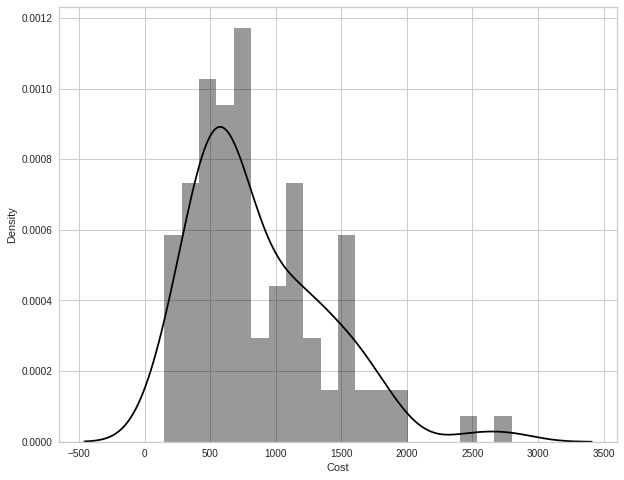

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data['Cost'], hist=True, kde=True, color='black', bins=20)

Text(0.5, 1.0, 'Log Transformed - Cost')

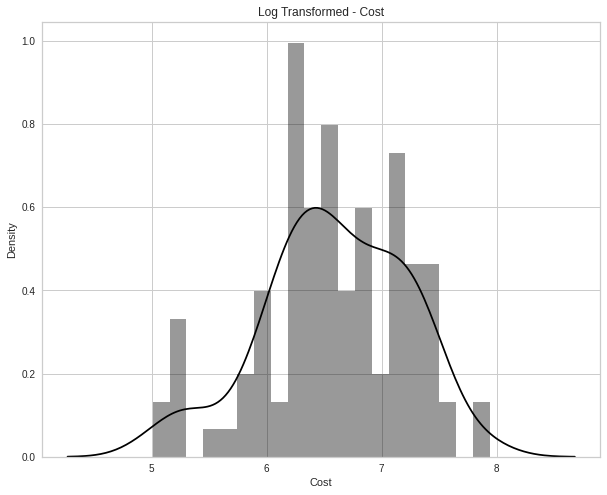

In [ ]:
#Log trasformed
plt.figure(figsize=(10,8))
sns.distplot(np.log(data['Cost']), hist=True, kde=True, color='black', bins=20)
plt.title("Log Transformed - Cost")

**Checking and imputing outliers**

Text(0.5, 0, 'Cost')

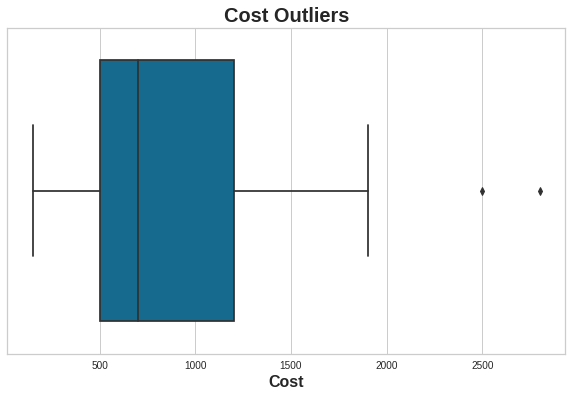

In [ ]:
#checking outliers
plt.figure(figsize=(10,6))
sns.boxplot(data['Cost'], color='b')
plt.title('Cost Outliers',fontsize=20, fontweight='bold')
plt.xlabel('Cost',fontsize=16, fontweight='bold')

In [ ]:
#checking outliers using iqr
def remove_outlier_using_IQR(data):
    Q1=data.quantile(0.25)
    Q2=data.quantile(0.50)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    data_final_output = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
    return data_final_output

In [ ]:
data['Cost'] = remove_outlier_using_IQR(data['Cost'])

Text(0.5, 0, 'Cost')

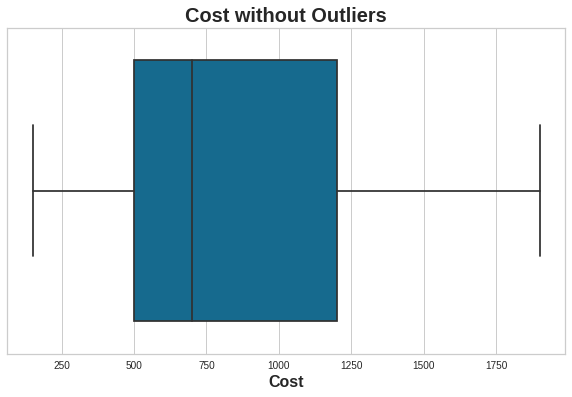

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data['Cost'], color='b')
plt.title('Cost without Outliers',fontsize=20, fontweight='bold')
plt.xlabel('Cost',fontsize=16, fontweight='bold')

# **Top 5 Cuisines**

In [ ]:
#Top 5 Cuisines
#Top 5 Cuisines
Cuisines_df = data['Cuisines'].value_counts().reset_index()
Cuisines_df.head()


index  Cuisines
0                North Indian, Chinese         3
1                         North Indian         3
2                            Fast Food         2
3       Biryani, North Indian, Chinese         2
4  South Indian, North Indian, Chinese         2

In [ ]:
Cuisines_df.rename(columns={'index': 'Cuisines_name','Cuisines': 'Count'}, inplace=True)

In [ ]:
Cuisines_df.head()

Cuisines_name  Count
0                North Indian, Chinese      3
1                         North Indian      3
2                            Fast Food      2
3       Biryani, North Indian, Chinese      2
4  South Indian, North Indian, Chinese      2

[Text(0, 0, 'North Indian, Chinese'),
 Text(0, 0, 'North Indian'),
 Text(0, 0, 'Fast Food'),
 Text(0, 0, 'Biryani, North Indian,\n Chinese'),
 Text(0, 0, 'South Indian,\n North Indian, Chinese')]

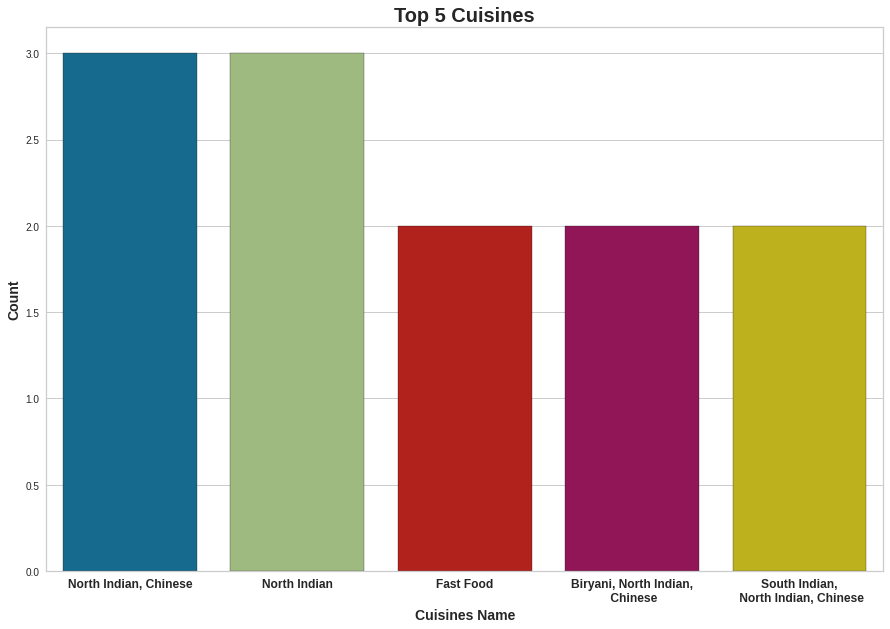

In [ ]:
#barplot top 5 cuisines
plt.figure(figsize=(15,10))
sns.barplot(x='Cuisines_name',y='Count',data=Cuisines_df[:5], edgecolor='k')
plt.title('Top 5 Cuisines', fontweight='bold',fontsize=20)

ax = plt.subplot()
LabelsList = ['North Indian, Chinese','North Indian','Fast Food','Biryani, North Indian,\n Chinese','South Indian,\n North Indian, Chinese']
ax.set_xlabel('Cuisines Name',fontweight='bold',fontsize=14)
ax.set_ylabel('Count',fontweight='bold',fontsize=14)
ax.xaxis.set_ticklabels(LabelsList,fontweight='bold',fontsize=12)

# **Bottom 5 Cuisines**

In [ ]:
#bottom 5 Cuisines
Cuisines_df.tail()

Cuisines_name  Count
87  Biryani, South Indian, North Indian, Chinese, ...      1
88         Italian, North Indian, South Indian, Asian      1
89                            North Indian, Fast Food      1
90                     Arabian, North Indian, Chinese      1
91                    Thai, Asian, Chinese, Malaysian      1

[Text(0, 0, 'Biryani, South Indian,\n North Indian,\n Chinese, Andhra'),
 Text(0, 0, 'Italian, North Indian,\n South Indian,\n Asian'),
 Text(0, 0, 'North Indian, \nFast Food'),
 Text(0, 0, 'Arabian, North\n Indian, Chinese'),
 Text(0, 0, 'Thai, Asian,\n Chinese, Malaysian')]

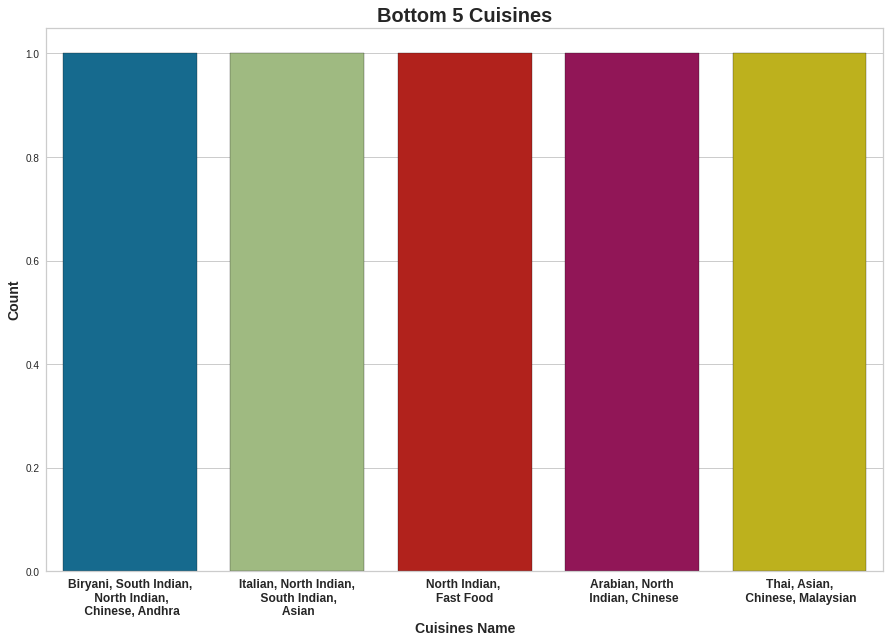

In [ ]:
#barplot bottom 5 cuisines
plt.figure(figsize=(15,10))
sns.barplot(x='Cuisines_name',y='Count',data=Cuisines_df[-5:], edgecolor='k')

plt.title('Bottom 5 Cuisines', fontweight='bold',fontsize=20)

ax = plt.subplot()
LabelsList1 = ['Biryani, South Indian,\n North Indian,\n Chinese, Andhra','Italian, North Indian,\n South Indian,\n Asian','North Indian, \nFast Food','Arabian, North\n Indian, Chinese','Thai, Asian,\n Chinese, Malaysian']
ax.set_xlabel('Cuisines Name',fontweight='bold',fontsize=14)
ax.set_ylabel('Count',fontweight='bold',fontsize=14)
ax.xaxis.set_ticklabels(LabelsList1,fontweight='bold',fontsize=12)

# **Top 5 Collections**

In [ ]:
data['Collections'] = data['Collections'].str.replace('\d+', '')

In [ ]:
#Top 5 Collections
collection_df = data['Collections'].value_counts().reset_index()
collection_df.head()

index  Collections
0                                      Unknown           52
1  Food Hygiene Rated Restaurants in Hyderabad            4
2                                Great Buffets            2
3                                  New on Gold            2
4                          Hyderabad's Hottest            2

In [ ]:
collection_df.rename(columns={'index':'Collection_name', 'Collections':'Count'}, inplace=True)

[Text(0, 0, 'Unknown'),
 Text(0, 0, 'Food Hygiene\n Rated Restaurants\n in Hyderabad'),
 Text(0, 0, 'Great Buffets'),
 Text(0, 0, 'New on Gold'),
 Text(0, 0, "Hyderabad's Hottest")]

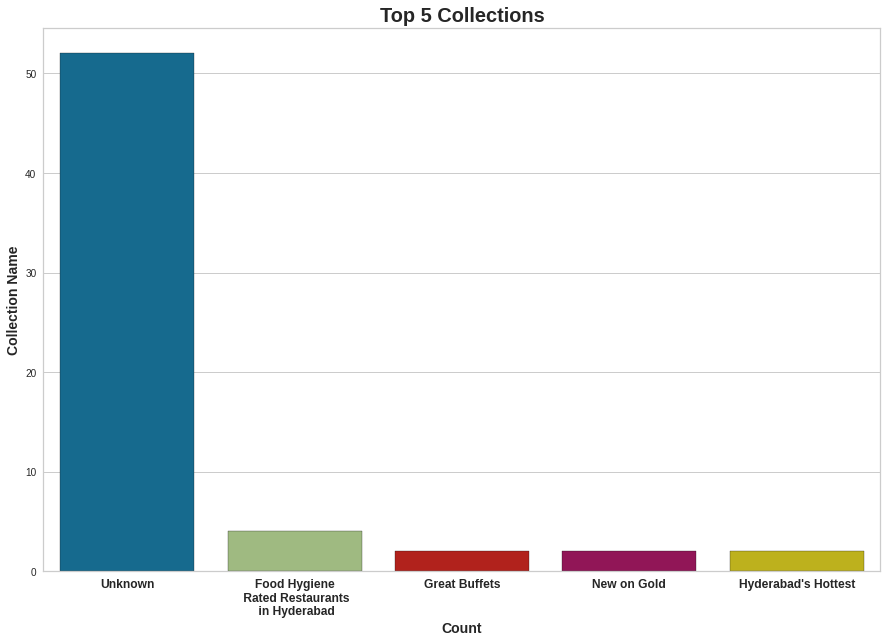

In [ ]:
#barplot top 5 Collections
plt.figure(figsize=(15,10))
sns.barplot(x='Collection_name',y='Count',data=collection_df[:5], edgecolor='k')

plt.title('Top 5 Collections', fontweight='bold',fontsize=20)

ax = plt.subplot()
LabelsList2 = ['Unknown','Food Hygiene\n Rated Restaurants\n in Hyderabad','Great Buffets','New on Gold',"Hyderabad's Hottest"]
ax.set_xlabel('Count',fontweight='bold',fontsize=14)
ax.set_ylabel('Collection Name',fontweight='bold',fontsize=14)
ax.xaxis.set_ticklabels(LabelsList2,fontweight='bold',fontsize=12)

In [ ]:
collection_df.tail()

Collection_name  Count
38            Live Sports Screenings, Gigs and Events      1
39  Rooftops, Live Sports Screenings, Best Bars & ...      1
40           Barbecue & Grill, Live Sports Screenings      1
41    Mandi, Great Buffets, The ‘Must Visit’ Eateries      1
42                                    Sunday Brunches      1

[Text(0, 0, 'Live Sports Screenings,\n Gigs and Events'),
 Text(0, 0, 'Rooftops,\nLive Sports Screenings,\n Best Bars & pubs'),
 Text(0, 0, 'Barbecue & Grill,\n Live Sports Screenings'),
 Text(0, 0, 'Mandi, Great Buffets,\n The ‘Must Visit’\nEateries'),
 Text(0, 0, 'Sunday Brunches')]

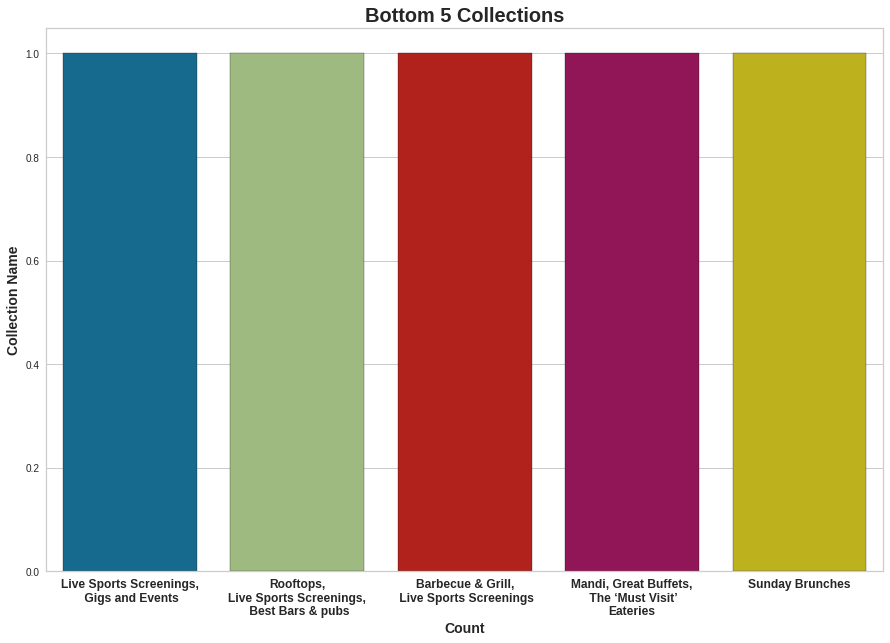

In [ ]:
#barplot bottom 5 cuisines
plt.figure(figsize=(15,10))
sns.barplot(x='Collection_name',y='Count',data=collection_df[-5:], edgecolor='k')
plt.title('Bottom 5 Collections', fontweight='bold',fontsize=20)

ax = plt.subplot()
LabelsList2 = ['Live Sports Screenings,\n Gigs and Events','Rooftops,\nLive Sports Screenings,\n Best Bars & pubs','Barbecue & Grill,\n Live Sports Screenings','Mandi, Great Buffets,\n The ‘Must Visit’\nEateries',"Sunday Brunches"]
ax.set_xlabel('Count',fontweight='bold',fontsize=14)
ax.set_ylabel('Collection Name',fontweight='bold',fontsize=14)
ax.xaxis.set_ticklabels(LabelsList2,fontweight='bold',fontsize=12)

# **Data Preprocessing**

In [ ]:
from sklearn import preprocessing 

from sklearn.model_selection import train_test_split, KFold

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
def text_process(msg):
    nopunc = [char for char in msg if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
data['Collections']

0      Food Hygiene Rated Restaurants in Hyderabad, C...
1                                    Hyderabad's Hottest
2                     Great Buffets, Hyderabad's Hottest
3                                 Late Night Restaurants
4      Best Bars & Pubs, Food Hygiene Rated Restauran...
                             ...                        
99                                               Unknown
100                                              Unknown
101                                              Unknown
103                                              Unknown
104                                 Pan-Asian Delicacies
Name: Collections, Length: 103, dtype: object

In [ ]:
data['Collections'] = data['Collections'].apply(text_process)
data['Cuisines'] = data['Cuisines'].apply(text_process)

In [ ]:
data['Collection_length'] = data['Collections'].apply(len)
data['Cuisine_lenth'] = data['Cuisines'].apply(len)

In [ ]:
data.head()

Cost                                        Collections  \
0   800.0  Food Hygiene Rated Restaurants Hyderabad Corpo...   
1   800.0                                 Hyderabads Hottest   
2  1300.0                   Great Buffets Hyderabads Hottest   
3   800.0                             Late Night Restaurants   
4  1200.0  Best Bars Pubs Food Hygiene Rated Restaurants ...   

                                            Cuisines  Collection_length  \
0  Chinese Continental Kebab European South India...                119   
1                       Biryani North Indian Chinese                 18   
2          Asian Mediterranean North Indian Desserts                 32   
3     Biryani North Indian Chinese Seafood Beverages                 22   
4  Asian Continental North Indian Chinese Mediter...                 96   

   Cuisine_lenth  
0             60  
1             28  
2             41  
3             46  
4             52

# **Count Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# create a count vectorizer object
count_vectorizer = CountVectorizer()
count_vectorizer.fit(data['Collections']) 
dict_colle = count_vectorizer.vocabulary_.items()


count_vectorizer.fit(data['Cuisines']) 
dict_cuisine = count_vectorizer.vocabulary_.items()



In [ ]:
dict_colle

dict_items([('food', 19), ('hygiene', 34), ('rated', 49), ('restaurants', 51), ('hyderabad', 32), ('corporate', 9), ('favorites', 18), ('great', 26), ('buffets', 8), ('toprated', 62), ('gold', 25), ('curated', 10), ('live', 37), ('sports', 56), ('screenings', 53), ('hyderabads', 33), ('hottest', 30), ('late', 36), ('night', 43), ('best', 3), ('bars', 2), ('pubs', 47), ('sunday', 58), ('brunches', 7), ('unknown', 64), ('trending', 63), ('week', 68), ('frozen', 21), ('delights', 12), ('street', 57), ('veggie', 65), ('friendly', 20), ('pocket', 46), ('barbecue', 1), ('grill', 27), ('happy', 29), ('hours', 31), ('rooftops', 52), ('italian', 35), ('gigs', 24), ('events', 16), ('haleem', 28), ('mandi', 38), ('must', 41), ('visit', 67), ('eateries', 15), ('fancy', 17), ('fun', 22), ('breakfasts', 5), ('shawarmas', 54), ('function', 23), ('venues', 66), ('regional', 50), ('panasian', 44), ('delicacies', 11), ('terrific', 59), ('thalis', 60), ('sneak', 55), ('peek', 45), ('ramzan', 48), ('mubar

In [ ]:
dict_cuisine

dict_items([('chinese', 10), ('continental', 11), ('kebab', 28), ('european', 15), ('south', 41), ('indian', 23), ('north', 37), ('biryani', 7), ('asian', 3), ('mediterranean', 31), ('desserts', 13), ('seafood', 40), ('beverages', 6), ('goan', 19), ('healthy', 20), ('food', 18), ('lebanese', 29), ('american', 0), ('ice', 22), ('cream', 12), ('street', 43), ('fast', 16), ('bbq', 5), ('italian', 25), ('finger', 17), ('burger', 8), ('japanese', 26), ('salad', 39), ('sushi', 44), ('mexican', 32), ('mughlai', 36), ('andhra', 1), ('bakery', 4), ('juices', 27), ('arabian', 2), ('hyderabadi', 21), ('cafe', 9), ('spanish', 42), ('wraps', 46), ('thai', 45), ('indonesian', 24), ('modern', 34), ('momos', 35), ('pizza', 38), ('eastern', 14), ('mithai', 33), ('malaysian', 30)])

In [ ]:
#Store the vocab and counts in pandas dataframe

#list to store vocab and count for collections name
vocab = []
count = []
for key, value in dict_colle:
  vocab.append(key)
  count.append(value)

vocab_bef_stem_coll = pd.Series(count, index=vocab )

vocab_bef_stem_coll = vocab_bef_stem_coll.sort_values(ascending = False)

In [ ]:
#list to store vocab and count for Cuisines
vocab = []
count = []
for key, value in dict_cuisine:
  vocab.append(key)
  count.append(value)

vocab_bef_stem_cuisine = pd.Series(count, index=vocab )

vocab_bef_stem_cuisine = vocab_bef_stem_cuisine.sort_values(ascending = False)

In [ ]:
vocab_bef_stem_coll

week        68
visit       67
venues      66
veggie      65
unknown     64
            ..
biryanis     4
best         3
bars         2
barbecue     1
bakeries     0
Length: 69, dtype: int64

In [ ]:
vocab_bef_stem_cuisine

wraps            46
thai             45
sushi            44
street           43
spanish          42
south            41
seafood          40
salad            39
pizza            38
north            37
mughlai          36
momos            35
modern           34
mithai           33
mexican          32
mediterranean    31
malaysian        30
lebanese         29
kebab            28
juices           27
japanese         26
italian          25
indonesian       24
indian           23
ice              22
hyderabadi       21
healthy          20
goan             19
food             18
finger           17
fast             16
european         15
eastern          14
desserts         13
cream            12
continental      11
chinese          10
cafe              9
burger            8
biryani           7
beverages         6
bbq               5
bakery            4
asian             3
arabian           2
andhra            1
american          0
dtype: int64

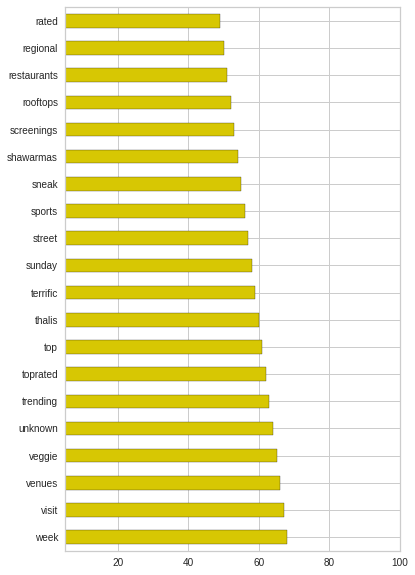

In [ ]:
#top vocab in collection name
top_vocab =  vocab_bef_stem_coll.head(20)
plt.figure(figsize=(6,10))
top_vocab.plot(kind='barh', xlim=(5,100), color='y', edgecolor='k')

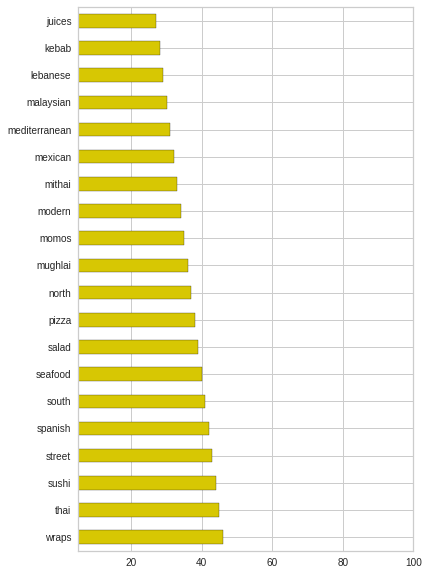

In [ ]:
#top vocab in collection name
top_vocab =  vocab_bef_stem_cuisine.head(20)
plt.figure(figsize=(6,10))
top_vocab.plot(kind='barh', xlim=(5,100), color='y', edgecolor='k')

**Stemming Function**

In [ ]:
#create the stemming function
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

def stemming(text):
  text = [stemmer.stem(word) for word in text.split()]
  return ' '.join(text)

In [ ]:
data['Collections'] = data['Collections'].apply(stemming)
data['Cuisines'] = data['Cuisines'].apply(stemming)


In [ ]:
data.head()

Cost                                        Collections  \
0   800.0  food hygien rate restaur hyderabad corpor favo...   
1   800.0                                  hyderabad hottest   
2  1300.0                     great buffet hyderabad hottest   
3   800.0                                 late night restaur   
4  1200.0  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  Collection_length  \
0  chines continent kebab european south indian n...                119   
1                        biryani north indian chines                 18   
2           asian mediterranean north indian dessert                 32   
3        biryani north indian chines seafood beverag                 22   
4  asian continent north indian chines mediterranean                 96   

   Cuisine_lenth  
0             60  
1             28  
2             41  
3             46  
4             52

**TfidfVectorizer**

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()
tfid_vectorizer.fit(data['Collections'])   

dict_colle_tf = tfid_vectorizer.vocabulary_.items()

In [ ]:
dict_colle_tf

dict_items([('food', 19), ('hygien', 33), ('rate', 48), ('restaur', 50), ('hyderabad', 32), ('corpor', 9), ('favorit', 18), ('great', 26), ('buffet', 8), ('toprat', 61), ('gold', 25), ('curat', 10), ('live', 36), ('sport', 55), ('screen', 52), ('hottest', 30), ('late', 35), ('night', 42), ('best', 3), ('bar', 1), ('pub', 46), ('sunday', 57), ('brunch', 7), ('unknown', 63), ('trend', 62), ('week', 67), ('frozen', 21), ('delight', 12), ('street', 56), ('veggi', 64), ('friend', 20), ('pocket', 45), ('barbecu', 2), ('grill', 27), ('happi', 29), ('hour', 31), ('rooftop', 51), ('italian', 34), ('gig', 24), ('event', 16), ('haleem', 28), ('mandi', 37), ('must', 40), ('visit', 66), ('eateri', 15), ('fanci', 17), ('fun', 22), ('breakfast', 5), ('shawarma', 53), ('function', 23), ('venu', 65), ('region', 49), ('panasian', 43), ('delicaci', 11), ('terrif', 58), ('thali', 59), ('sneak', 54), ('peek', 44), ('ramzan', 47), ('mubarak', 39), ('milkshak', 38), ('top', 60), ('drink', 14), ('destin', 13)

In [ ]:
#Store the vocab and counts in pandas dataframe

#list to store vocab and count for collections name
vocab = []
count = []
for key, value in dict_colle_tf:
  vocab.append(key)
  count.append(value)

vocab_bef_stem_coll_tf = pd.Series(count, index=vocab )

vocab_bef_stem_coll_tf = vocab_bef_stem_coll_tf.sort_values(ascending = False)

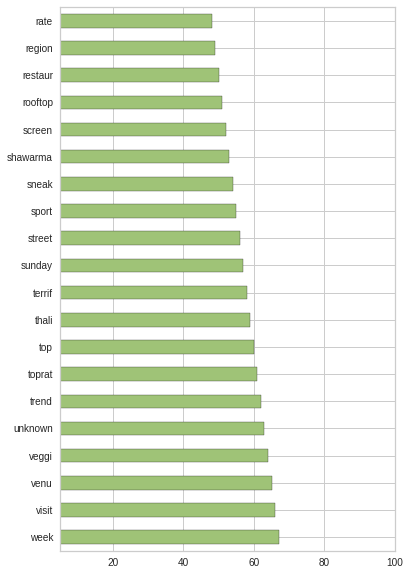

In [ ]:
#top vocab in collection name by tfidf 
top_vocab =  vocab_bef_stem_coll_tf.head(20)
plt.figure(figsize=(6,10))
top_vocab.plot(kind='barh', xlim=(5,100), color='g', edgecolor='k')

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()
tfid_vectorizer.fit(data['Cuisines'])   

dict_colle_tf_cuisine = tfid_vectorizer.vocabulary_.items()

In [ ]:
dict_colle_tf_cuisine

dict_items([('chines', 10), ('continent', 11), ('kebab', 28), ('european', 15), ('south', 41), ('indian', 23), ('north', 37), ('biryani', 7), ('asian', 3), ('mediterranean', 31), ('dessert', 13), ('seafood', 40), ('beverag', 6), ('goan', 19), ('healthi', 20), ('food', 18), ('lebanes', 29), ('american', 0), ('ice', 22), ('cream', 12), ('street', 43), ('fast', 16), ('bbq', 5), ('italian', 25), ('finger', 17), ('burger', 8), ('japanes', 26), ('salad', 39), ('sushi', 44), ('mexican', 32), ('mughlai', 36), ('andhra', 1), ('bakeri', 4), ('juic', 27), ('arabian', 2), ('hyderabadi', 21), ('cafe', 9), ('spanish', 42), ('wrap', 46), ('thai', 45), ('indonesian', 24), ('modern', 34), ('momo', 35), ('pizza', 38), ('eastern', 14), ('mithai', 33), ('malaysian', 30)])

In [ ]:
#Store the vocab and counts in pandas dataframe

#list to store vocab and count for cuisine name
vocab = []
count = []
for key, value in dict_colle_tf_cuisine:
  vocab.append(key)
  count.append(value)

vocab_bef_stem_cuisine_tf = pd.Series(count, index=vocab )

vocab_bef_stem_cuisine_tf = vocab_bef_stem_cuisine_tf.sort_values(ascending = False)

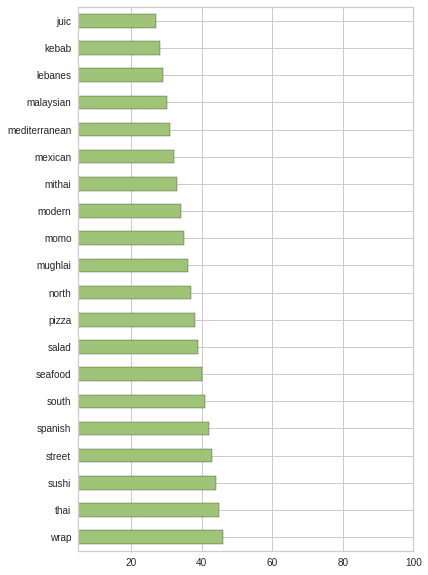

In [ ]:
#top vocab in collection name by tfidf 
top_vocab =  vocab_bef_stem_cuisine_tf.head(20)
plt.figure(figsize=(6,10))
top_vocab.plot(kind='barh', xlim=(5,100), color='g', edgecolor='k')

In [ ]:
data[['Collections', 'Cuisines']].head()

Collections  \
0  food hygien rate restaur hyderabad corpor favo...   
1                                  hyderabad hottest   
2                     great buffet hyderabad hottest   
3                                 late night restaur   
4  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  
0  chines continent kebab european south indian n...  
1                        biryani north indian chines  
2           asian mediterranean north indian dessert  
3        biryani north indian chines seafood beverag  
4  asian continent north indian chines mediterranean


# **Calculated Silhouetee Score**

### Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* ### Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* ### Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

### The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

**Applying Silhouette Score Method**

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:

X_features_rec_mon = data[["Collection_length", "Cuisine_lenth"]]
scaler_rec_mon = StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4571932159509172
For n_clusters = 3, silhouette score is 0.4655721742824229
For n_clusters = 4, silhouette score is 0.47991333821117166
For n_clusters = 5, silhouette score is 0.4470937866569815
For n_clusters = 6, silhouette score is 0.46356258341943013
For n_clusters = 7, silhouette score is 0.4439905087146002
For n_clusters = 8, silhouette score is 0.453690601360472



# **K-Means Clustering**
**Applying Elbow Method on Recency and Monetary**

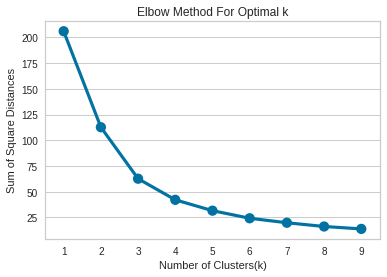

In [ ]:
#
sum_of_sq_dist = {}
for k in range(1,10):
  km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  km.fit(X)
  sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


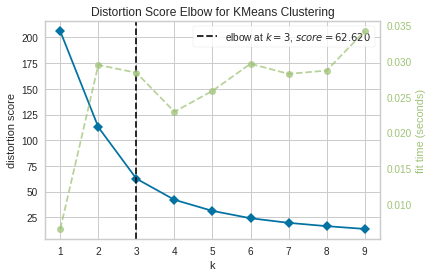

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
vzr = KElbowVisualizer(KMeans(), k=(1, 10))
vzr.fit(X)
vzr.poof()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

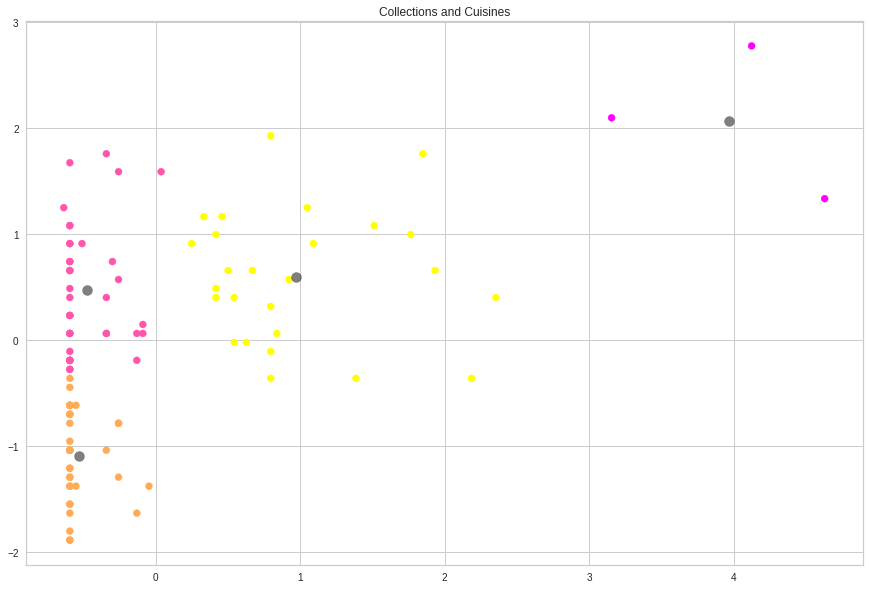

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Collections and Cuisines')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

# **Applying Silhouetee Score Method**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.

Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
'''
range_n_clusters = [2,3,4,5,6,7,8]

for k in range_n_clusters:
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0,len(X) + (k+1)*100])

  clusterer = KMeans(n_clusters=k)
  preds = clusterer.fit_predict(X)
  score = silhouette_score(X, preds)
  print('for clusterer n = {}, silhouette score is {}'.format(k,score))

  #compute the silhouette score for each smaples
  sample_silhouette_values = silhouette_samples(X, preds)

'''






"\nrange_n_clusters = [2,3,4,5,6,7,8]\n\nfor k in range_n_clusters:\n  fig, (ax1,ax2) = plt.subplots(1,2)\n  fig.set_size_inches(18,7)\n\n  ax1.set_xlim([-0.1,1])\n  ax1.set_ylim([0,len(X) + (k+1)*100])\n\n  clusterer = KMeans(n_clusters=k)\n  preds = clusterer.fit_predict(X)\n  score = silhouette_score(X, preds)\n  print('for clusterer n = {}, silhouette score is {}'.format(k,score))\n\n  #compute the silhouette score for each smaples\n  sample_silhouette_values = silhouette_samples(X, preds)\n\n"

In [ ]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.4352320905434519


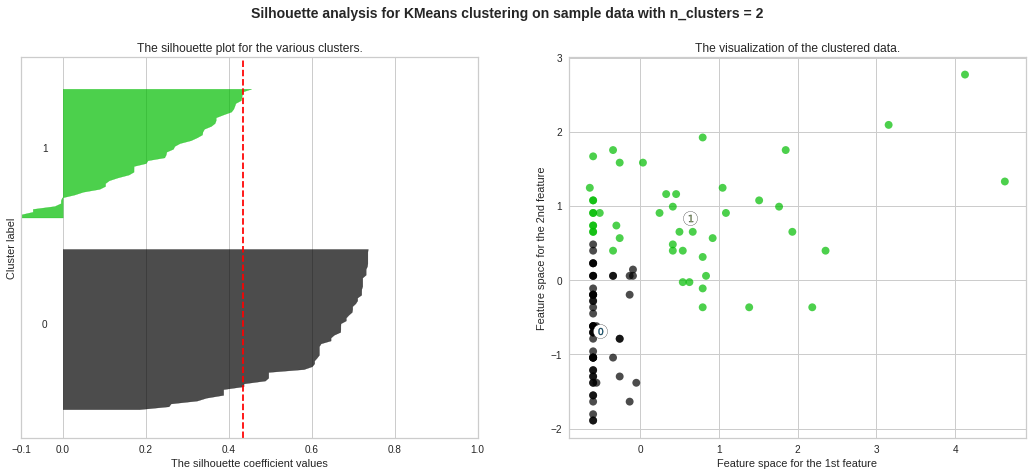

For n_clusters = 3 The average silhouette_score is : 0.4655721742824229


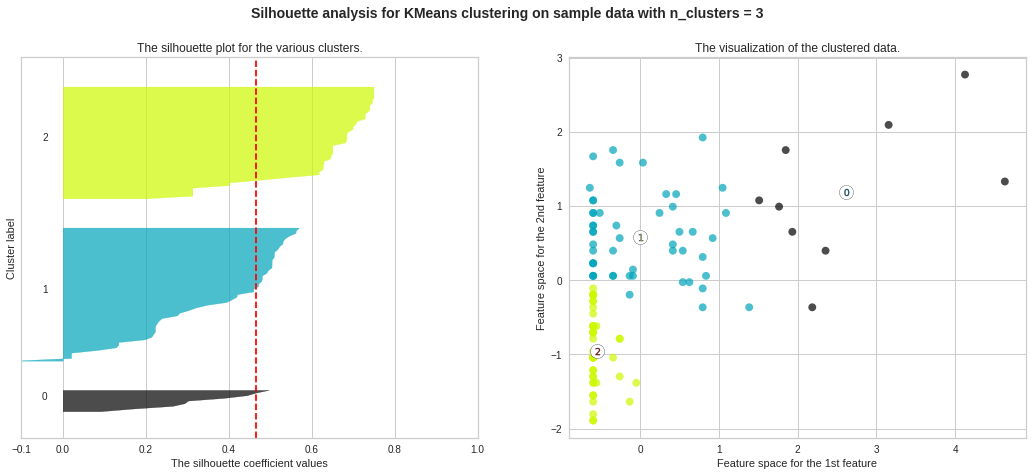

For n_clusters = 4 The average silhouette_score is : 0.47991333821117166


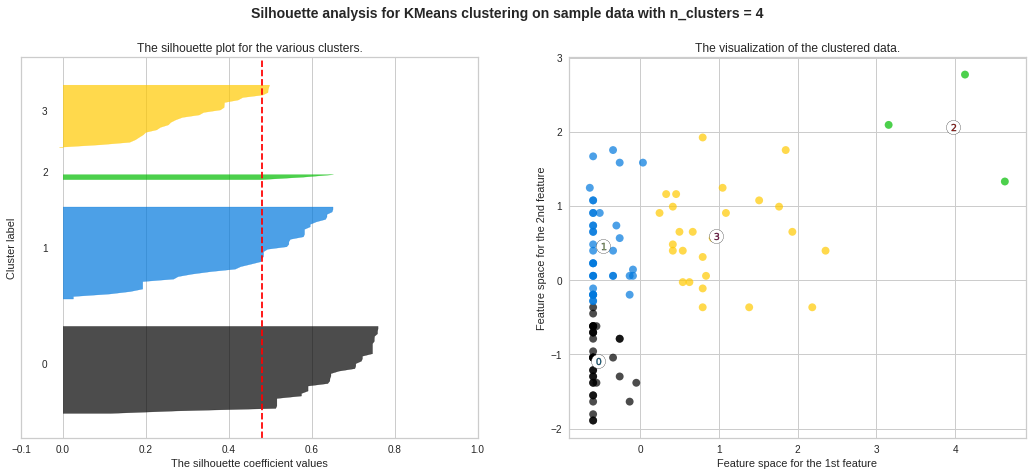

For n_clusters = 5 The average silhouette_score is : 0.4470937866569815


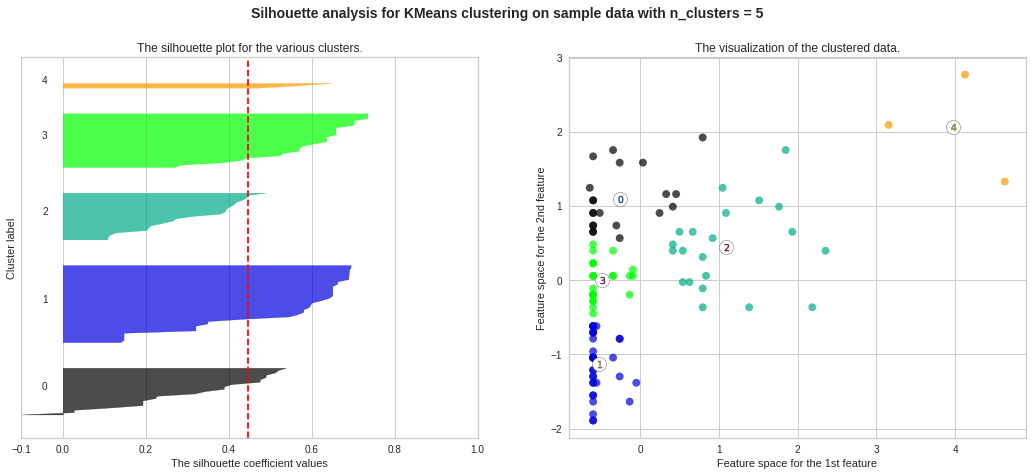

For n_clusters = 6 The average silhouette_score is : 0.4500653110849317


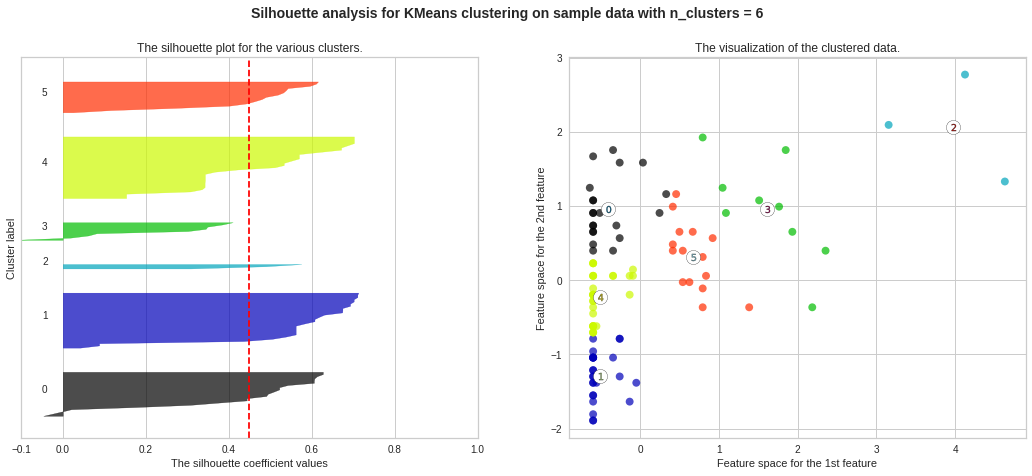

For n_clusters = 7 The average silhouette_score is : 0.4439905087146002


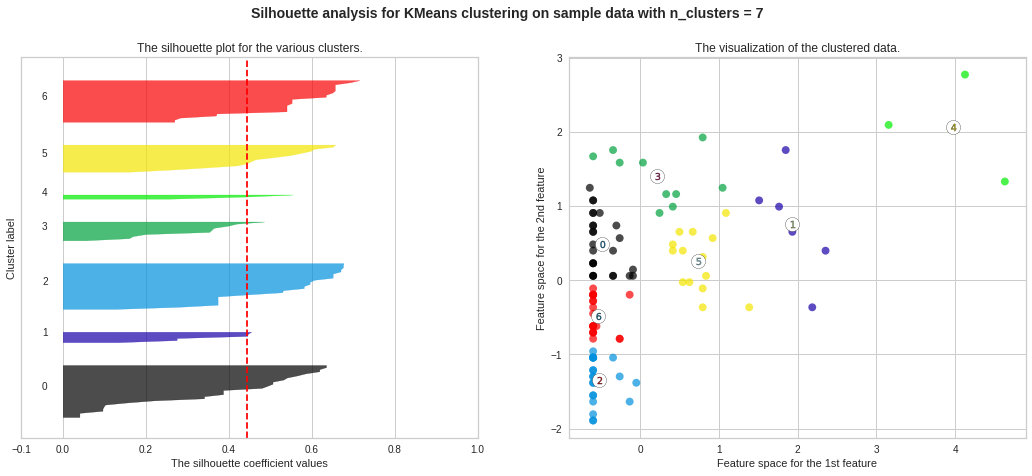

For n_clusters = 8 The average silhouette_score is : 0.4419154915787883


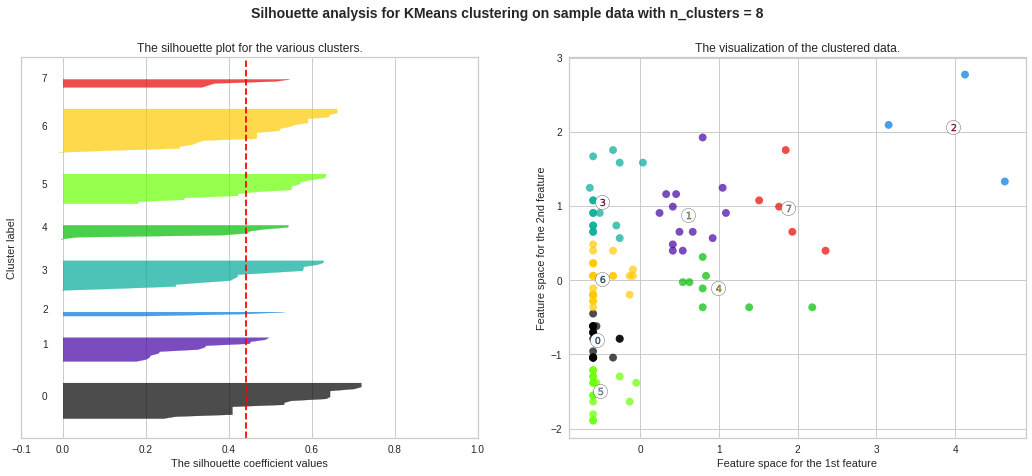

In [ ]:

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=250, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

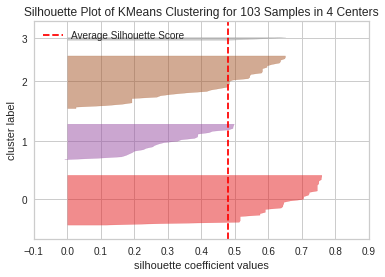

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

vzr = SilhouetteVisualizer(KMeans(n_clusters=4))
vzr.fit(X)
vzr.poof()

# **Dendrogram to find optimal number of cluster**

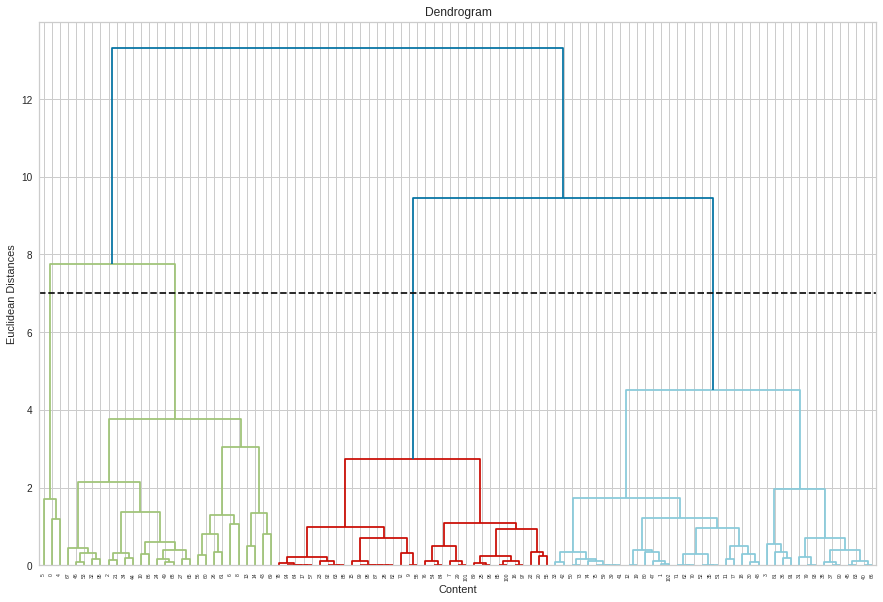

In [ ]:
#use dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.axhline(y=7, color='k', linestyle='--', label='K=4')
plt.show() 

**Agglomerative hierarchical Clustering**

In [ ]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

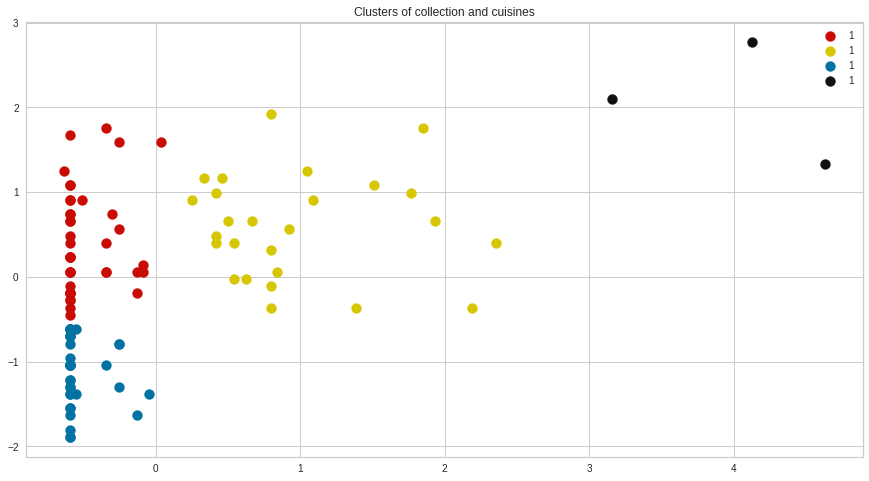

In [ ]:
# Visualizing the clusters 

plt.figure(figsize=(15,8))
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s=100, color='r', label='1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s=100, color='y', label='1')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s=100, color='b', label='1')
plt.scatter(X[y_hc == 3,0], X[y_hc == 3,1], s=100, color='k', label='1')
plt.title('Clusters of collection and cuisines')
plt.legend()
plt.show()

**By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 4**


## **Sentiment Analysis**

**Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative our neutral. Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.**


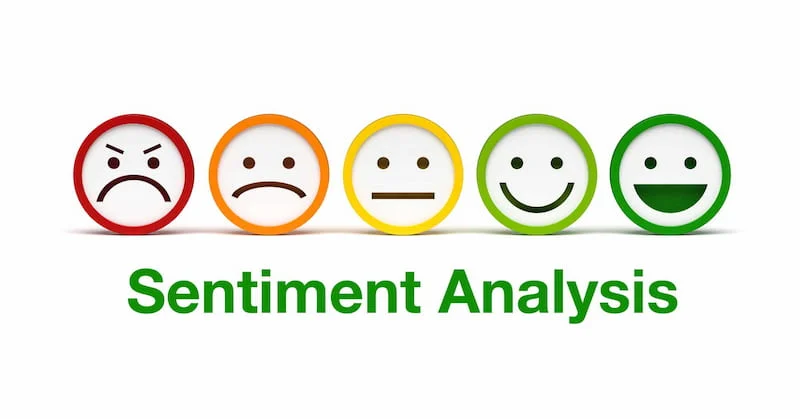

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
#loading Zomato Restaurant reviews dataset
sentiment_data = pd.read_csv('/content/drive/MyDrive/Capstone Project-04/Zomato Restaurant reviews.csv')
sentiment_data.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [ ]:
sentiment_data.tail()

Restaurant          Reviewer  \
9995  Chinese Pavilion  Abhishek Mahajan   
9996  Chinese Pavilion    Sharad Agrawal   
9997  Chinese Pavilion         Ramandeep   
9998  Chinese Pavilion   Nayana Shanbhag   
9999  Chinese Pavilion  Bhargava Krishna   

                                                 Review Rating  \
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6

In [ ]:
sentiment_data.shape

(10000, 7)

In [ ]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
sentiment_data.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
sentiment_data = sentiment_data[['Review', 'Rating']]
sentiment_data.head()

Review Rating
0  The ambience was good, food was quite good . h...      5
1  Ambience is too good for a pleasant evening. S...      5
2  A must try.. great food great ambience. Thnx f...      5
3  Soumen das and Arun was a great guy. Only beca...      5
4  Food is good.we ordered Kodi drumsticks and ba...      5

In [ ]:
#drop all null values if any
sentiment_data = sentiment_data.dropna(how='any')

In [ ]:
sentiment_data[sentiment_data['Rating']=='Like']

Review Rating
7601  One of the best pizzas to try. It served with ...   Like

In [ ]:
sentiment_data['Rating'] = sentiment_data['Rating'].drop(7601)

In [ ]:
sentiment_data['Rating'] = sentiment_data['Rating'].astype(float)

In [ ]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  9955 non-null   object 
 1   Rating  9954 non-null   float64
dtypes: float64(1), object(1)
memory usage: 491.4+ KB


In [ ]:
#Distribution of restaurant rating
sentiment_data['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

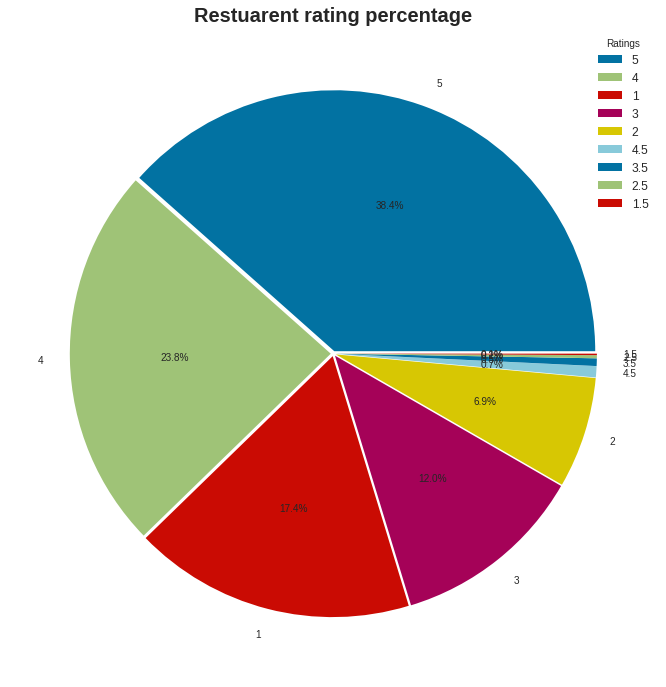

In [ ]:
plt.figure(figsize=(12,12))
plt.pie(sentiment_data['Rating'].value_counts(), labels = ['5','4','1','3','2','4.5','3.5','2.5','1.5'], autopct ='%1.1f%%', explode = (0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01))
plt.legend(labels = ['5','4','1','3','2','4.5','3.5','2.5','1.5'],title='Ratings',fontsize=12, loc='upper right' )
plt.title("Restuarent rating percentage",fontweight='bold',fontsize=20)
plt.show()

In [ ]:
#label the rating range
pd.cut(sentiment_data['Rating'], bins=3).value_counts(sort=False)

(0.996, 2.333]    2428
(2.333, 3.667]    1258
(3.667, 5.0]      6268
Name: Rating, dtype: int64

In [ ]:
labels = ['bad','average','good']
sentiment_data['Rating_label'] = pd.cut(sentiment_data['Rating'], bins=3, labels=labels)
sentiment_data.head()

Review  Rating Rating_label
0  The ambience was good, food was quite good . h...     5.0         good
1  Ambience is too good for a pleasant evening. S...     5.0         good
2  A must try.. great food great ambience. Thnx f...     5.0         good
3  Soumen das and Arun was a great guy. Only beca...     5.0         good
4  Food is good.we ordered Kodi drumsticks and ba...     5.0         good

In [ ]:
sentiment_data = sentiment_data.drop(["Rating"], axis =1)


In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [ ]:
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:

from nltk.corpus import wordnet
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# **Lemmatization**

Lemmatization is quite similar to stemming, as it also converts a word into its base form. However the root word also called lemma, is present in dictionary. It is considerably slower than stemming becasue an additonal step is perfomed to check if the lemma formed is present in dictionary.

In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag


lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [ ]:
'''
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')

text = list(sentiment_data['Review'])
tokenized = sent_tokenize(text)
for i in tokenized:
     
    # Word tokenizers is used to find the words
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)
 
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words]
 
    #  Using a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)
 
    print(tagged)\
'''

"\nimport nltk\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize, sent_tokenize\n\nnltk.download('punkt')\n\ntext = list(sentiment_data['Review'])\ntokenized = sent_tokenize(text)\nfor i in tokenized:\n     \n    # Word tokenizers is used to find the words\n    # and punctuation in a string\n    wordsList = nltk.word_tokenize(i)\n \n    # removing stop words from wordList\n    wordsList = [w for w in wordsList if not w in stop_words]\n \n    #  Using a Tagger. Which is part-of-speech\n    # tagger or POS-tagger.\n    tagged = nltk.pos_tag(wordsList)\n \n    print(tagged)"

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#lemmatized review
sentiment_data['Review'] = sentiment_data['Review'].apply(lemmatize_words)
sentiment_data

Review Rating_label
0     ambience good, food quite good saturday lunch ...         good
1     ambience good pleasant evening. service prompt...         good
2     must try.. great food great ambience. thnx ser...         good
3     soumen da arun great guy. behavior sincerety, ...         good
4     food good.we order kodi drumstick basket mutto...         good
...                                                 ...          ...
9995  madhumathi mahajan well start nice courteous s...      average
9996  place never disappointed us.. food, courteous ...         good
9997  bad rating mainly "chicken bone found veg food...          bad
9998  personally love prefer chinese food. couple ti...         good
9999  checked try delicious chinese food here, see n...      average

[9955 rows x 2 columns]

In [ ]:


from sklearn.model_selection import train_test_split
x = sentiment_data['Review']
y = sentiment_data['Rating_label']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 , random_state = 0)



#**LogisticRegression**

In [ ]:
#vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
model = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', LogisticRegression())])
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_train

array(['good', 'bad', 'good', ..., 'average', 'good', 'good'],
      dtype=object)

In [ ]:
y_pred_test = model.predict(x_test)
y_pred_test

array(['good', 'bad', 'bad', ..., 'good', 'good', 'bad'], dtype=object)

In [ ]:
##generate confusion matrix for train data 
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_pred_train, y_train)
cm

array([[ 340,   21,   19],
       [ 142, 1634,   61],
       [ 466,  155, 4628]])

[Text(0, 0.5, 'bad'), Text(0, 1.5, 'average'), Text(0, 2.5, 'good')]

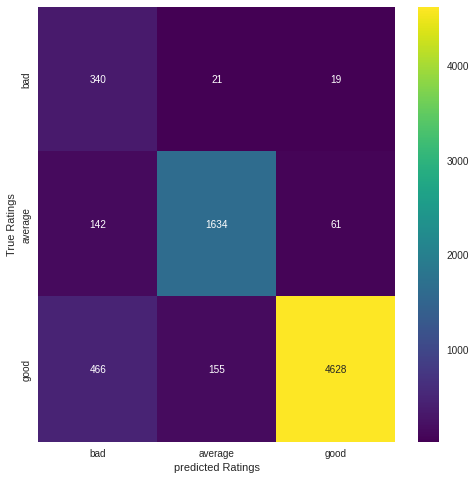

In [ ]:
#heatcamp from confusion matrix for LogisticRegression 
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
labels = ['bad','average','good']
ax = plt.subplot()
ax.set_xlabel('predicted Ratings')
ax.set_ylabel('True Ratings')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


In [ ]:

print('classification_report for LogisticRegression \n',classification_report(y_train,y_pred_train))

classification_report for LogisticRegression 
               precision    recall  f1-score   support

     average       0.89      0.36      0.51       948
         bad       0.89      0.90      0.90      1810
        good       0.88      0.98      0.93      4708

    accuracy                           0.88      7466
   macro avg       0.89      0.75      0.78      7466
weighted avg       0.89      0.88      0.87      7466



In [ ]:
##generate confusion matrix for test data 
y_pred_test = model.predict(x_test)
y_pred_test.astype(str)

array(['good', 'bad', 'bad', ..., 'good', 'good', 'bad'], dtype='<U7')

In [ ]:
'''
##generate confusion matrix for test data 

cm1 = confusion_matrix(y_pred_test, y_test)
cm1
'''

'\n##generate confusion matrix for test data \n\ncm1 = confusion_matrix(y_pred_test, y_test)\ncm1\n'

In [ ]:
#check  accuracy_score, precision_score, recall_score

'''
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy :", accuracy_score(y_pred_test, y_test))
print("Precision :", precision_score(y_pred_test, y_test))
print("Recall :", recall_score(y_pred_test, y_test))
'''

'\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score\nprint("Accuracy :", accuracy_score(y_pred_test, y_test))\nprint("Precision :", precision_score(y_pred_test, y_test))\nprint("Recall :", recall_score(y_pred_test, y_test))\n'

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', RandomForestClassifier())])
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred_train_rf= model.predict(x_train)
y_pred_train_rf

array(['good', 'bad', 'good', ..., 'average', 'good', 'good'],
      dtype=object)

In [ ]:
##generate confusion matrix for random forest 
cm1 = confusion_matrix(y_pred_train_rf, y_train)
cm1

array([[ 913,    3,    4],
       [  14, 1783,    8],
       [  21,   24, 4696]])

[Text(0, 0.5, 'bad'), Text(0, 1.5, 'average'), Text(0, 2.5, 'good')]

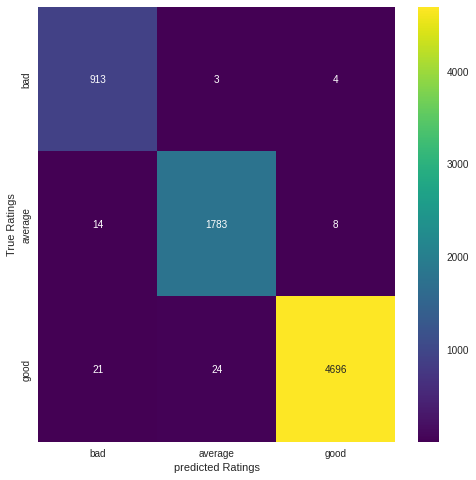

In [ ]:
#heatcamp from confusion matrix for random forest
plt.figure(figsize=(8,8))
sns.heatmap(cm1, annot=True, fmt='d', cmap='viridis')
labels = ['bad','average','good']
ax = plt.subplot()
ax.set_xlabel('predicted Ratings')
ax.set_ylabel('True Ratings')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('Classifiation report RandomForestClassifier')
print(classification_report(y_train,y_pred_train_rf))

Classifiation report RandomForestClassifier
              precision    recall  f1-score   support

     average       0.99      0.96      0.98       948
         bad       0.99      0.99      0.99      1810
        good       0.99      1.00      0.99      4708

    accuracy                           0.99      7466
   macro avg       0.99      0.98      0.99      7466
weighted avg       0.99      0.99      0.99      7466



In [ ]:
sentiment_data['Review'][4]

'food good.we order kodi drumstick basket mutton biryani. good. thanks pradeep. serve well. enjoy here. ambience also good.'

In [ ]:
#taking example to understand above model
example = ['food good.we order kodi drumstick basket mutton biryani. good. thanks pradeep. serve well. enjoy here. ambience also good.']
result = model.predict(example)
print(result)


['good']


In [ ]:
sentiment_data['Review'][9997]


'bad rating mainly "chicken bone found veg food" acceptable vegetarian. satiate cravings chinese food head chinese pavilion also voucher available little app luncheon tray rs 310 (veg) [well bother voucher price veg luncheon tray rs 275/- tax restaurant itself). ambiance decent since noon, many table occupy pretty quite. thrusday special (veg): hot sour soup: ok well sprout crunchy mouth: something different. kimchi salad (personally i\'m never fond it) potato plum sauce good well make brocolli, baby corn, mushroom spicy sauce dish live name \'too spicy\'; fine fry rice veg hakka noodle good veg fry rice overall food taste good piece chicken bone come friend\'s (he pure vegetarian) mouth eat noodles. disappointment complete experience ruined. well management apologise surely cannot put thing correct offering use coupon surely want visit place again. request see kitchen really segregate pan veg/non-veg cooking manager decline make believe don\'t. staff service fine really need improve s

In [ ]:
example = ["bad rating mainly chicken bone found veg food acceptable vegetarian. satiate cravings chinese food head chinese pavilion also voucher available little app luncheon tray rs 310 (veg) [well bother voucher price veg luncheon tray rs 275/- tax restaurant itself). ambiance decent since noon, many table occupy pretty quite. thrusday special (veg): hot sour soup: ok well sprout crunchy mouth: something different. kimchi salad (personally i'm never fond it) potato plum sauce good well make brocolli, baby corn, mushroom spicy sauce dish live name 'too spicy'; fine fry rice veg hakka noodle good veg fry rice overall food taste good piece chicken bone come friend's (he pure vegetarian) mouth eat noodles. disappointment complete experience ruined. well management apologise surely cannot put thing correct offering use coupon surely want visit place again. request see kitchen really segregate pan veg/non-veg cooking manager decline make believe don't. staff service fine really need improve segregation veg non-veg indian culture mean lot. uploaded photo bone found."]
result = model.predict(example)
print(result)

['bad']


In [ ]:
example = ["quatity of food is so better."]
result = model.predict(example)
print(result)

['good']


In [ ]:
#number of 
sentiment_data['Rating_label'].value_counts()

good       6268
bad        2428
average    1258
Name: Rating_label, dtype: int64

In [ ]:
good = x_train[y_train[y_train=='good'].index]
bad = x_train[y_train[y_train == 'bad'].index]
average = x_train[y_train[y_train == 'average'].index]


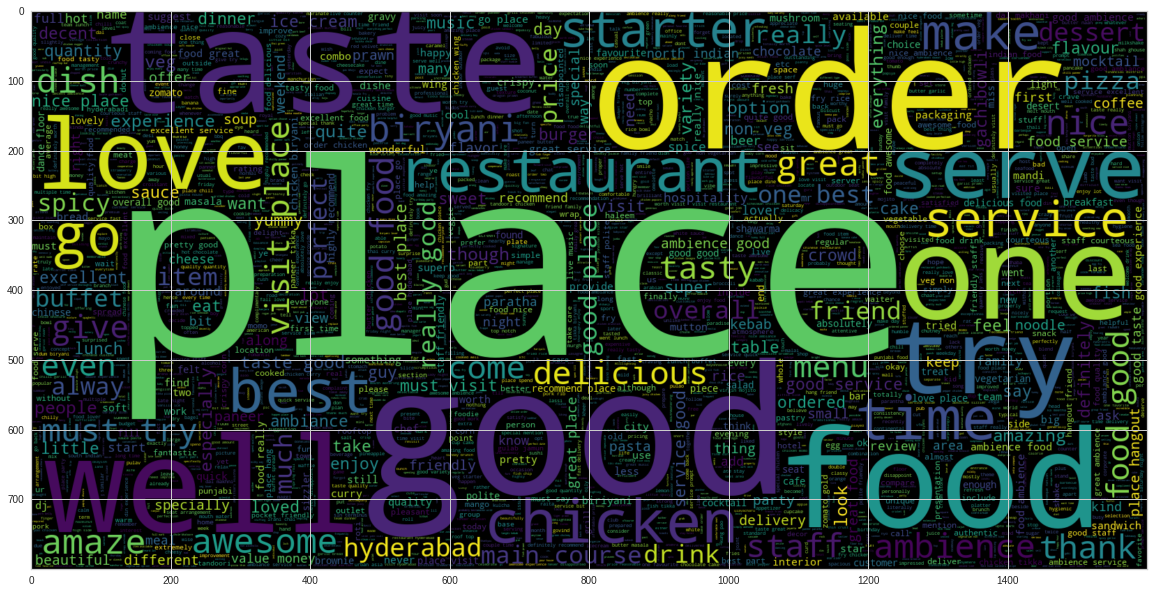

In [ ]:

# Text Reviews with good Ratings
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(good))
plt.imshow(wc,interpolation = 'bilinear')

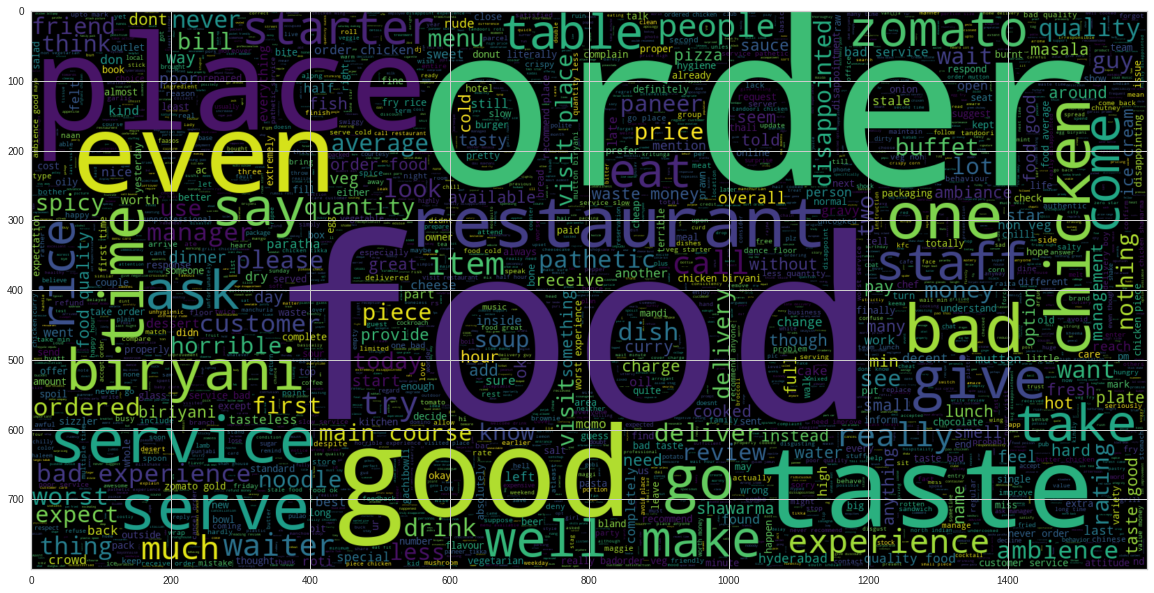

In [ ]:
#Text reviews with bad ratings
plt.figure(figsize=(20,20))
wc = WordCloud(min_font_size=3, width=1600, height=800, background_color='black',max_words=3000).generate(' '.join(bad))
plt.imshow(wc, interpolation='bilinear')

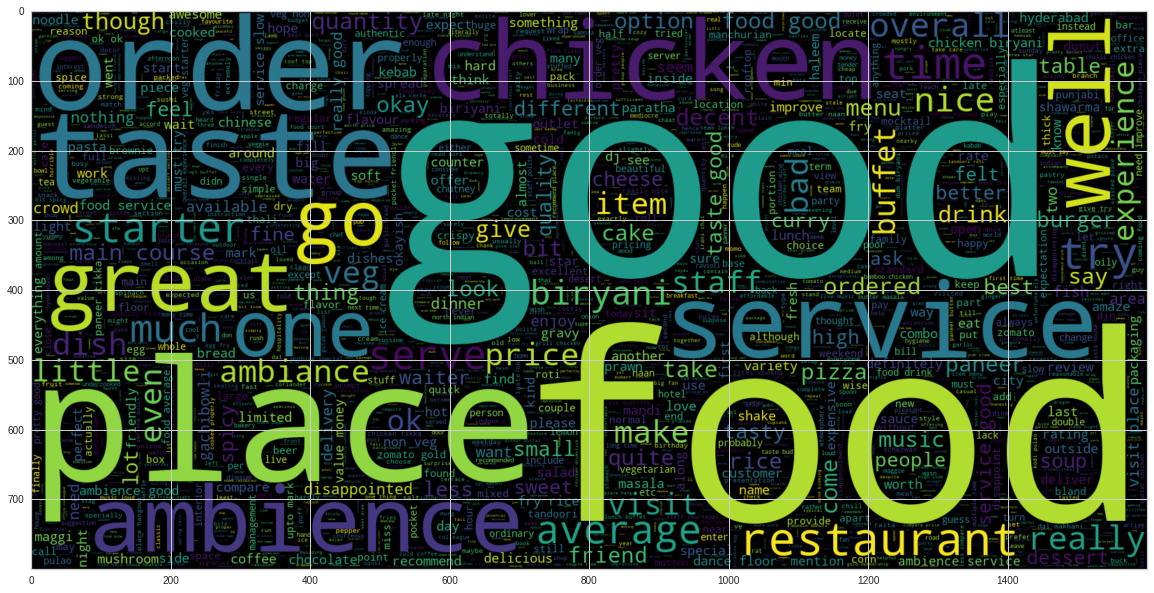

In [ ]:
#Text reviews with average ratings
plt.figure(figsize=(20,20))
wc = WordCloud(min_font_size=3, width=1600, height=800, background_color='black',max_words=3000).generate(' '.join(average))
plt.imshow(wc, interpolation='bilinear')

# **Conclusion**

**Clustering Analysis**

* Top 5 cuisines are 'North Indian, Chinese','North Indian','Fast Food','Biryani, North Indian, Chinese','South Indian,North Indian, Chinese'.

* Bottom 5 cuicines are 'Biryani, South Indian,North Indian,Chinese, Andhra','Italian, North Indian,South Indian, Asian','North Indian,Fast Food','Arabian, North Indian, Chinese','Thai, Asian, Chinese, Malaysian'


* In collection top vocab used is week, visit,venues,veggie,unknown etc.

* In cuisines top vocab used is wrap, thai,sushi,wraps, street,spanish,south etc.  

* silhouette score at **n_clusters = 4**, we get highest silhouette score is 0.47229

* From elbow method we get 4 number of cluster is best among all.

* Applied agglomerative hierarchical clustering from this we find 4 number of cluster good fit our model.

* By applying different clustering algorithem to our dataset. we get the optimal number of cluster is equal to 4.

**Sentiment Analysis**

* Categorize rating in 3 types i.e. good, bad and average. 4500+ good, 1700+ bad and 900+ average ratigs given by customer.

* By using  logistic regression and random forest regression model on reviews dataset, we get 89% accuracy at logistic regression  & 99% accuracy at random forest regression.